## Categorical CRQA

Categorical CRQA (catCRQA) is used to uncover the dynamics of two different behavioural time series, such as conversation transcripts. It is performed in much the same manner as [Categorical RQA](rqaCategorical.ipynb). In a cross recurrence plot (CRP), two integer number time series are plotted against each other on orthogonal axes, 𝑥𝑖 = 1...𝑛 and 𝑦𝑗 = 1...𝑛. Recurrent states between the two time series are then indicated by blue points. The resulting plot reflects the way the two systems follow each other's behavioural states in time. CRQA quantifies these properties through various metrics, including:

- Recurrence Rate (%REC): The percentage of recurrent points in the plot, which indicates how often states between the two time series reoccur with one another.
- Determinism (%DET): The percentage of recurrent points that form diagonal lines of at least a given length (e.g., 2 points), indicating how often the same sequence of states reoccurs in both systems.
- Maxline: The length of the longest diagonal sequence of recurrent points. Higher values indicate prolonged periods of recurrent behaviour.
- Meanline: The average length of diagonal lines in the plot, giving insight into the typical duration of repeated patterns between the time series.
- Entropy (ENT): The Shannon entropy of the distribution of diagonal line lengths, which measures the complexity of coordination between the two systems.
- Laminarity (LAM): The percentage of recurrent points forming vertical lines, which reflects instances of stationarity between the time series.

#### Parameters for Running Categorical CRQA

Much like [Categorical RQA](rqaCategorical.ipynb), we need to set three parameters:

- Time delay: This represents the interval between samples required to unfold the temporal structure of a system's trajectory. The appropriate delay helps to reconstruct the system’s dynamics in the phase space. For categorical CRQA, this is typically set to 1.
- Embedding dimension: This is the number of dimensions needed to recover the system's phase space. For categorical CRQA, this is also typically set to 1.
- Radius: This defines how close two states must be to be considered recurrent. For categorical CRQA, the radius is set to zero or a very small value, ensuring that only exact matches between categorical states are considered recurrent.


#### Let's Practice Running CRQA on Categorical Data

Before we begin, we need to import and load various packages and utilities. These will allow us to import the data, manipulate it, run CRQA, and create visualisations to explore our results.

The code below will do all the setup for you. Simply click the "play" button on the left to run the code, and we'll be ready to start our analysis. 

In [1]:
import os
import pandas as pd
from utils import filter_data, interpolate_missing_data
from utils.rqa_utils import perform_crqa
from utils.plot_utils import plot_ts_and_crqa

Now that all the utilities are loaded, it's time to apply DFA to some real data — in this case, [conversation data](data/crqaCategorical/conversation_real.txt).

First, we need to represent the words from each speaker as a sequence of categorical integers. This means each word is assigned a unique number, starting from the first word and moving forward (e.g., ‘I’ = 1, ‘need’ = 2, ‘to’ = 3, etc.). For the file we're using, this encoding has already been done for you.

With our data prepared, we can proceed with running the CRQA analysis. Just click the "play" button below to perform the analysis and generate the visualisations.

Loading file: conversation_real.txt


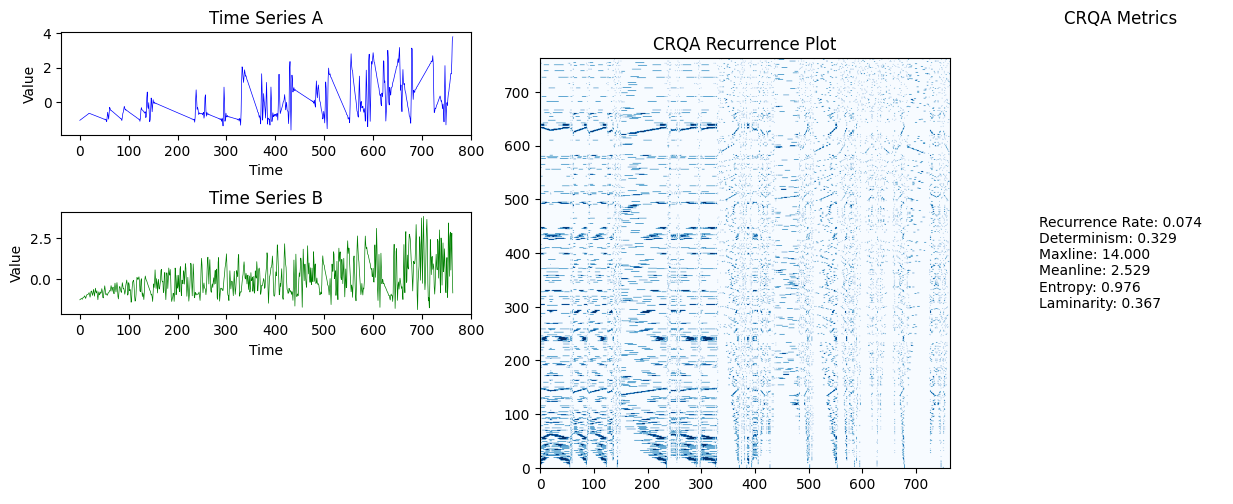

CRQA analysis and plotting completed successfully!


In [4]:
# First set the directory path for the data
data_directory = "data/crqaCategorical/"

# Then decide whether you'd like to save the plots 
# These are saved in "images/rqa"
save_image = True

# Set the file name for the data
file_name = "conversation_real.txt"
file_path = os.path.join(data_directory, file_name)

# RQA parameters
crqa_params = {
    'delay': 1,
    'embedding_dimension': 1,
    'radius': 0.1,
    'minLine': 2,
    'getRP': True
}

# Check whether the file containing the data exists
if os.path.exists(file_path):
    print(f'Loading file: {file_name}')

    # Load the file into a DataFrame
    data = pd.read_csv(file_path, header=None, sep='\t')

    # Interpolate any missing data that might be present in the file
    data = interpolate_missing_data(data)

    # Apply a filter to the data
    data = filter_data(data)
    
    # Normalise the data by using a z-score
    data = (data - data.mean()) / data.std()

    # Perform CRQA using perform_rqa function from rqa_utils
    crqa_results, rp_results = perform_crqa(data, **crqa_params)

    # Create RQA metrics dictionary
    for column, result in crqa_results.items():
        crqa_metrics = {
            'Recurrence Rate': result.recurrence_rate,
            'Determinism': result.determinism,
            'Maxline': result.longest_diagonal_line,
            'Meanline': result.average_diagonal_line,
            'Entropy': result.entropy_diagonal_lines,
            'Laminarity': result.laminarity,
        }

    # Plot time series and recurrence plot side-by-side
    plot_ts_and_crqa(data.iloc[:, 0].values, data.iloc[:, 1].values, rp_results['0_1'].recurrence_matrix, crqa_metrics, save_image, f'images/rqa/{file_name}_combined_plot.png')

    print('CRQA analysis and plotting completed successfully!')
else:
    print(f'File {file_name} not found in directory {data_directory}')

#### Interpreting the Results

If your code ran successfully, you should see the following CRQA metrics for the data:

- %REC: 7.4% - This value tells us how often the two speakers used similar words at a similar time. Higher recurrence values indicate greater alignment in word usage between the speakers.
- %DET: 32.9% - This represents the proportion of recurrence points that form diagonal lines, reflecting the predictability of speaker's word usage.
- Maxline: 14 - This metric identifies the longest sequence of recurring word usage between speakers.
- Meanline: 2.5 - This is the average length of diagonal lines in the recurrence plot, giving us insight into the typical duration for which the speakers' word usage remained the same.

Now let's see how these metrics compare when we analyse conversation data of individuals who were not paired together. Click "play" on the code chunk below to run CRQA on a [transcript](data/crqaCategorical/conversation_pseudo.txt), comprised of pseudo data, and observe the differences.

Loading file: conversation_real.txt


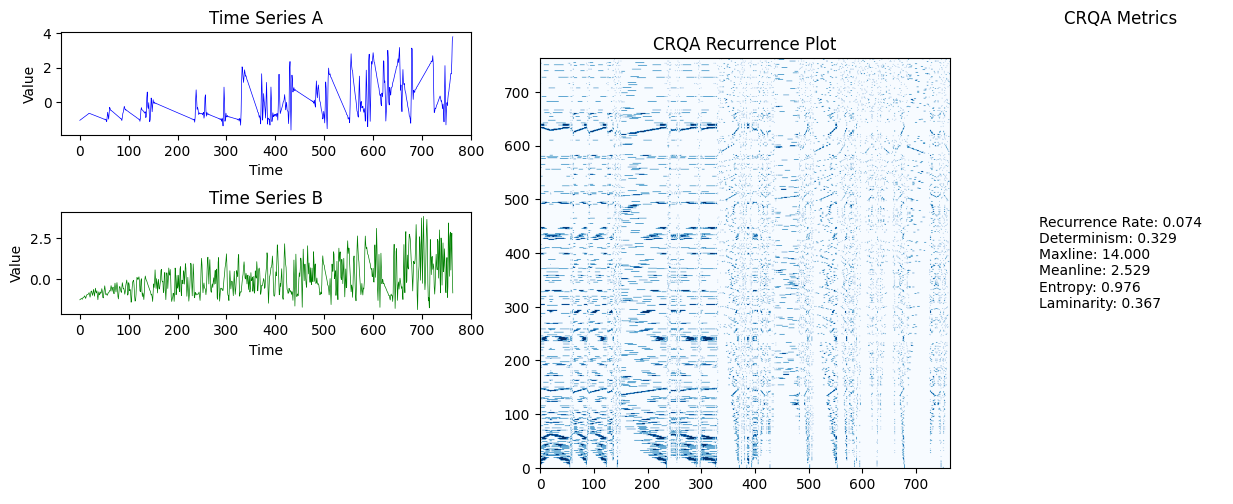

CRQA analysis and plotting completed successfully for conversation_real.txt!
Loading file: conversation_pseudo.txt


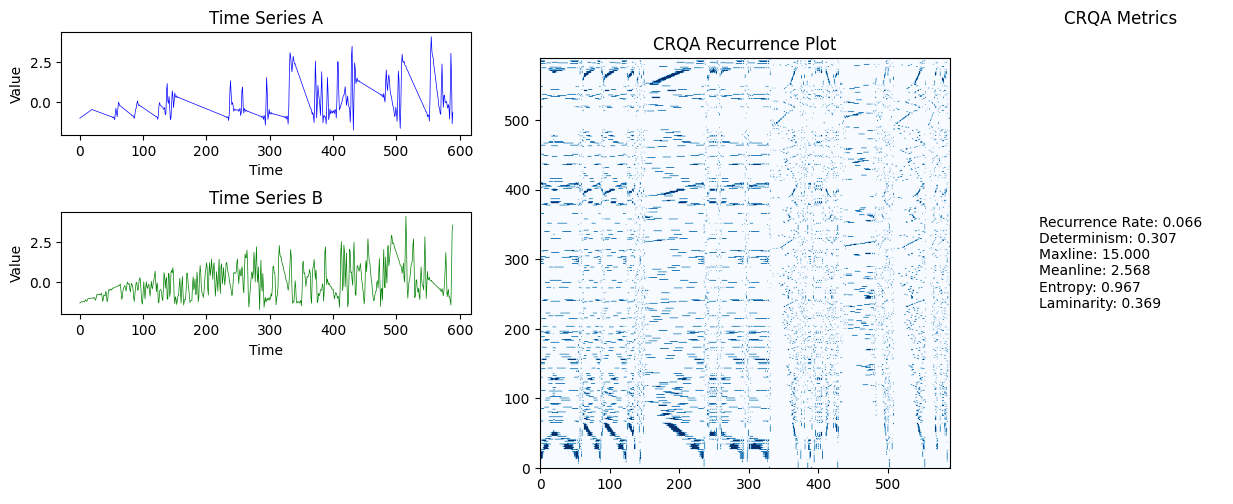

CRQA analysis and plotting completed successfully for conversation_pseudo.txt!


In [5]:
import os
import pandas as pd

# First set the directory path for the data
data_directory = "data/crqaCategorical/"

# Then decide whether you'd like to save the plots
# These are saved in "images/rqa"
save_image = True

# Set the file names for the data
file_names = ["conversation_real.txt", "conversation_pseudo.txt"]

# RQA parameters
crqa_params = {
    'delay': 1,
    'embedding_dimension': 1,
    'radius': 0.1,
    'minLine': 2,
    'getRP': True
}

# Loop through the file names
for file_name in file_names:
    file_path = os.path.join(data_directory, file_name)

    # Check whether the file containing the data exists
    if os.path.exists(file_path):
        print(f'Loading file: {file_name}')

        # Load the file into a DataFrame
        data = pd.read_csv(file_path, header=None, sep='\t')

        # Interpolate any missing data that might be present in the file
        data = interpolate_missing_data(data)

        # Apply a filter to the data
        data = filter_data(data)

        # Normalise the data by using a z-score
        data = (data - data.mean()) / data.std()

        # Perform CRQA using perform_crqa function from rqa_utils
        crqa_results, rp_results = perform_crqa(data, **crqa_params)

        # Create RQA metrics dictionary
        for column, result in crqa_results.items():
            crqa_metrics = {
                'Recurrence Rate': result.recurrence_rate,
                'Determinism': result.determinism,
                'Maxline': result.longest_diagonal_line,
                'Meanline': result.average_diagonal_line,
                'Entropy': result.entropy_diagonal_lines,
                'Laminarity': result.laminarity,
            }

        # Plot time series and recurrence plot side-by-side
        plot_ts_and_crqa(
            data.iloc[:, 0].values,
            data.iloc[:, 1].values,
            rp_results['0_1'].recurrence_matrix,
            crqa_metrics,
            save_image,
            f'images/rqa/{file_name}_combined_plot.png'
        )

        print(f'CRQA analysis and plotting completed successfully for {file_name}!')
    else:
        print(f'File {file_name} not found in directory {data_directory}')


#### Comparing the Results

If you examine the recurrence plots (RPs) and the resulting RQA metrics, you'll notice that the second conversation contains less recurrent activity than the first. There are more blue lines in the first plot, and the %REC (recurrence rate) and %DET (determinism) values are higher, indicating greater overall repetition and more extended sequences of repeating phrases.

#### Going Further

To expand your understanding of categorical CRQA, you can try the following:

1. Analyse other time series: Repeat the analyses above with other types of categorical data such as eye movements towards various screen locations.
2. Experiment with other parameters: Although most nominal or categorical data uses the following parameters - delay = 1, embedding dimension = 1, radius = 0 (or .0001), try changing these to see how differences in the parameters affect the recurrence plots and metrics.